### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [ ]:
df=pd.read_csv('cancer_classification.csv')

### Getting info of the data frame

In [ ]:
df.info() # to check whether there is any null data in your dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Getting statiscal information about numeric variables

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Exploratory Data Analysis on data set

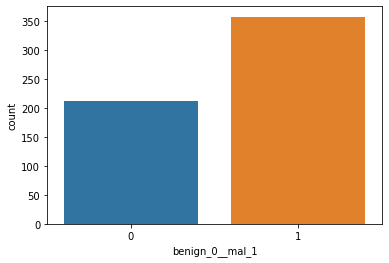

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df) # to check the count of the no of malign tumour and non cancerous tumor

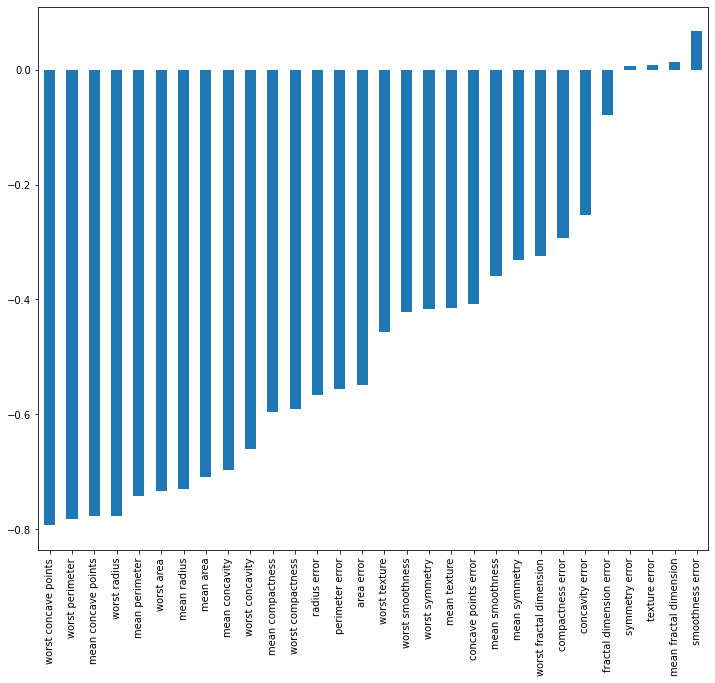

In [ ]:
plt.figure(figsize=(12,10))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

### Plotting correlation heatmap to get insights of the correlated variables

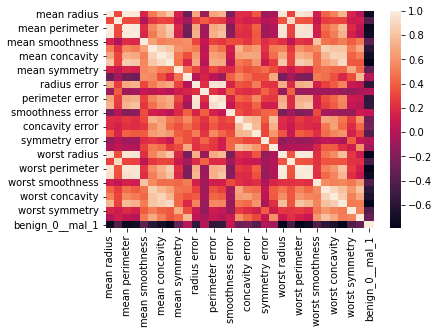

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1']

### Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


### Normalising the dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Import keras and tensorflow to build a neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Defining a neural network with one input, one hidden and one output layer

In [ ]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# Binary Classification (That is sigmoid function is chosen as it will give values between 0 and 1)
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, verbose='auto',validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6998 - val_loss: 0.6818
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6726 - val_loss: 0.6521
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6451 - val_loss: 0.6153
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6080 - val_loss: 0.5729
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5681 - val_loss: 0.5298
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5276 - val_loss: 0.4850
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4868 - val_loss: 0.4403
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4446 - val_loss: 0.3973
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4063 - val_loss: 0.3579
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3679 - val_loss: 0.3203
Epoch 11

### Plotting the loss history to check whether model is overfit or underfit

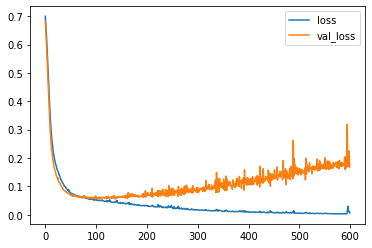

In [ ]:
df1=pd.DataFrame(model.history.history)
df1.plot() # the plot shows overfitting as the validation loss is increasing after some time

In [ ]:
# To avoid the problem of overfitting, we could either use early stopping or dropout layer


### Training the data set again and early stopping it to prevent overfitting as seen in above graph

In [ ]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# Binary Classification (That is sigmoid function is chosen)
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) # mode is basically what you are tyring to do either minimizing or maximizing the metrics
# patience means waiting for this many epochs before deciding to stop training

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, verbose='auto',validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6824 - val_loss: 0.6614
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6531 - val_loss: 0.6326
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6274 - val_loss: 0.6039
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6022 - val_loss: 0.5751
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.5443
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5481 - val_loss: 0.5118
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5159 - val_loss: 0.4746
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4810 - val_loss: 0.4336
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4402 - val_loss: 0.3878
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3990 - val_loss: 0.3429
Epoch 11

In [ ]:
df1=pd.DataFrame(model.history.history)

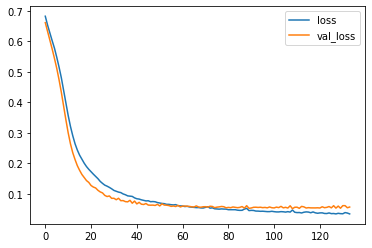

In [ ]:
df1.plot()

### Dropout of neurons methods to deal with overfitting is also shown here

In [ ]:
# another method of stopping overfitting
# Dropout layers that is stoping the percentage of neurons at particular layer
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # randomly half neurons in the above layer will be turned off in every epoch
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
# Binary Classification (That is sigmoid function is chosen)
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, verbose='auto',validation_data=(X_test,y_test),callbacks=[earlystop]) # this is early stopping done with dropout

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7314 - val_loss: 0.6907
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6933 - val_loss: 0.6566
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6637 - val_loss: 0.6333
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6557 - val_loss: 0.6089
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6418 - val_loss: 0.5817
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.5586
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5891 - val_loss: 0.5288
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5937 - val_loss: 0.5033
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5698 - val_loss: 0.4795
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5358 - val_loss: 0.4562
Epoch 11

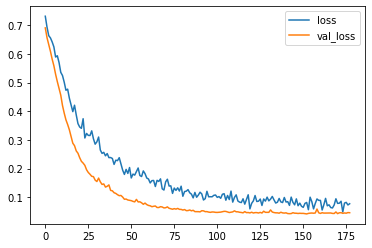

In [ ]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

### Classifying the nature of tumour on test data set

In [ ]:
# This is good fitting
predictions=model.predict(X_test) 
classes_x=np.argmax(predictions,axis=1)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred = np.round(predictions).astype(int) # this was done so that classification does not have non zero and one value

### Evaluating the results

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[53  1]
 [ 1 88]]
